# **Actividad 7: Redes Neuronales Artificiales**
*   2132219 Jorge David Tobias Olloqui IMC
*   2132092 David Alejandro Herrera Herrera IMC
*   2109374 Gabriel Emiliano Cuétero Meza IMC
*   2131987 Luis Raúl González Aguirre IMC
*   2012057 Angel Gabriel Jasso Barcena IMC


# UANL FIME
# Inteligencia Artificial y Redes Neuronales

Instrucciones.-

* El estudiante entrenará un modelo de Red Neuronal Prealimentada en Google Colab por medio del lenguaje de programación Python. Este modelo usará el conjunto de datos MNIST; este conjunto de datos contiene imágenes de baja resolución con dígitos del 0 al 9 escritos a mano. El conjunto de datos es parte de la librería Keras. Más información acerca de este conjunto de datos: https://keras.io/api/datasets/mnist/  

* Durante el preprocesamiento de los datos, se utilizará la función “load_data()” de la librería Keras para cargar el conjunto de datos y generar los conjuntos de entrenamiento (train_data, train_labels) y de prueba (test_data, test_label). Se puede utilizar la división de datos predeterminada por esta misma función.

* Se entrenará una red neuronal artificial prealimentada con los datos de entrenamiento utilizando la función “fit” de la librería scikit-learn. El estudiante propondrá una estructura de red neuronal artificial prealimentada. La función de activación en la capa de salida deberá ser softmax.

* Se establecerá el tipo de función de pérdida y optimizador a utilizar. La métrica a utilizar para evaluar el proceso de entrenamiento será la exactitud (accuracy).

* Utilizar la función “evaluate” para mostrar la exactitud de predicción del modelo con el conjunto de datos de prueba (test_data).

* Realizar 5 diferentes predicciones con el conjunto de datos de prueba (test_data). En el resultado mostrar la predicción y el valor real.

Importamos librerias

In [1]:
# importar librerías
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Cargamos datos

In [2]:
# 1. Cargar el conjunto de datos MNIST
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Preprocesamiento de datos

In [3]:
# 2. Normalizar las imágenes (escalar valores de píxeles entre 0 y 1)
train_data = train_data / 255.0
test_data = test_data / 255.0

# 3. One-hot encoding de las etiquetas
train_labels_cat = to_categorical(train_labels, num_classes=10)
test_labels_cat = to_categorical(test_labels, num_classes=10)

**Ya con las imagenes preprocesadas, seleccionamos y entrenamos el modelo**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8605 - loss: 0.4766 - val_accuracy: 0.9603 - val_loss: 0.1383
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9638 - loss: 0.1181 - val_accuracy: 0.9605 - val_loss: 0.1289
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9757 - loss: 0.0803 - val_accuracy: 0.9677 - val_loss: 0.1084
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9822 - loss: 0.0582 - val_accuracy: 0.9688 - val_loss: 0.0988
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9856 - loss: 0.0426 - val_accuracy: 0.9689 - val_loss: 0.1090
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9877 - loss: 0.0383 - val_accuracy: 0.9725 - val_loss: 0.1054
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9906 - loss: 0.0285 - val_accuracy: 0.9732 - val_loss: 0.0980
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9921 - loss: 0.022

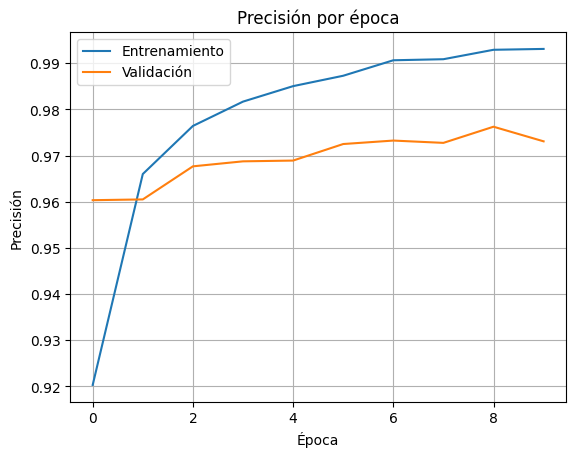

In [4]:
# 4. Definir el modelo (red neuronal artificial prealimentada)
modelo = Sequential([
    Flatten(input_shape=(28, 28)),          # Aplanar la imagen de entrada
    Dense(128, activation='relu'),          # Capa oculta con 128 neuronas
    Dense(64, activation='relu'),           # Otra capa oculta con 64 neuronas
    Dense(10, activation='softmax')         # Capa de salida para 10 clases
])

# 5. Compilar el modelo
modelo.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# 6. Entrenar el modelo
history = modelo.fit(train_data, train_labels_cat,
                     epochs=20,
                     validation_split=0.2,
                     batch_size=32)

# 7. Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = modelo.evaluate(test_data, test_labels_cat)
print(f"Exactitud en el conjunto de prueba: {test_accuracy:.4f}")

# 8. Guardar el modelo en formato .keras
modelo.save("modelo_mnist.keras")

# 9. Graficar precisión por época
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión por época')
plt.legend()
plt.grid()
plt.show()


**Ahora que nuestro modelo esta entrenado, pasaremos a hacer predicciones para cada una de las clases y asi podemos probar el modelo por nuestras propias manos y recursos**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step

🖼️ Imagen #1
✔️ Valor real: 7
🔮 Predicción : 7


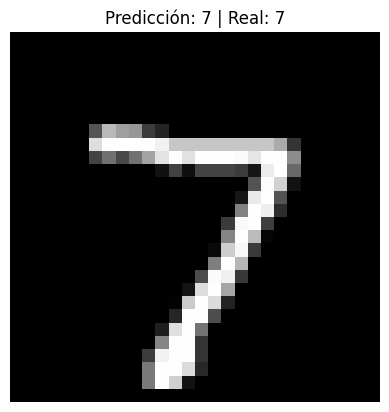

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

🖼️ Imagen #2
✔️ Valor real: 2
🔮 Predicción : 2


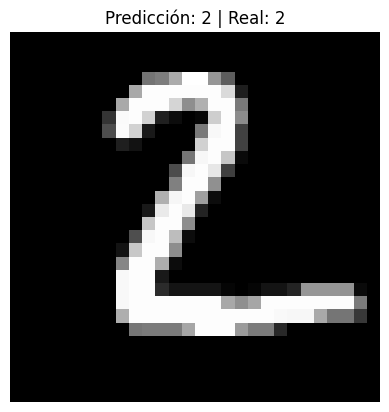

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

🖼️ Imagen #3
✔️ Valor real: 1
🔮 Predicción : 1


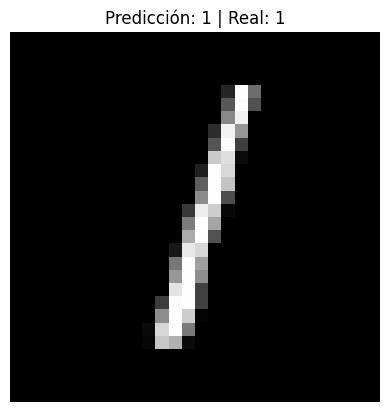

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

🖼️ Imagen #4
✔️ Valor real: 0
🔮 Predicción : 0


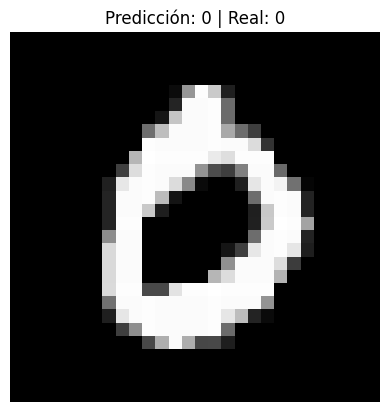

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

🖼️ Imagen #5
✔️ Valor real: 4
🔮 Predicción : 4


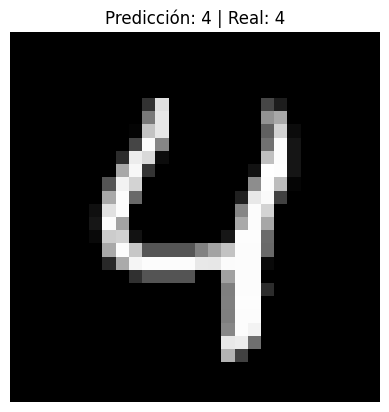

In [5]:
# --- Cargar modelo .keras ---
modelo = tf.keras.models.load_model("modelo_mnist.keras")

# --- Cargar datos de prueba ---
(_, _), (test_data, test_labels) = mnist.load_data()

# Normalizar imágenes (escala de 0 a 1)
test_data = test_data / 255.0

# Expandir dimensiones para incluir canal (28, 28) → (28, 28, 1)
test_data = np.expand_dims(test_data, axis=-1)

# --- Realizar 5 predicciones ---
for i in range(5):
    imagen = test_data[i:i+1]  # Imagen con batch size 1
    etiqueta_real = test_labels[i]

    pred = modelo.predict(imagen)
    clase_predicha = np.argmax(pred)

    # Mostrar resultados
    print(f"\n🖼️ Imagen #{i+1}")
    print(f"✔️ Valor real: {etiqueta_real}")
    print(f"🔮 Predicción : {clase_predicha}")

    plt.imshow(np.squeeze(imagen), cmap='gray')
    plt.title(f"Predicción: {clase_predicha} | Real: {etiqueta_real}")
    plt.axis('off')
    plt.show()
